# Centroid Calculation for Gaussian and Lorentzian Distributions

This notebook demonstrates the calculation of the centroid for Gaussian and Lorentzian distributions. It also shows how the centroid is affected when two distributions are combined.

In [10]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import simpson

# Define a Gaussian function
gaussian = (
    lambda x, mu, sigma: 1
    / np.sqrt(2 * np.pi * sigma**2)
    * np.exp(-0.5 * (x - mu) ** 2 / sigma**2)
)

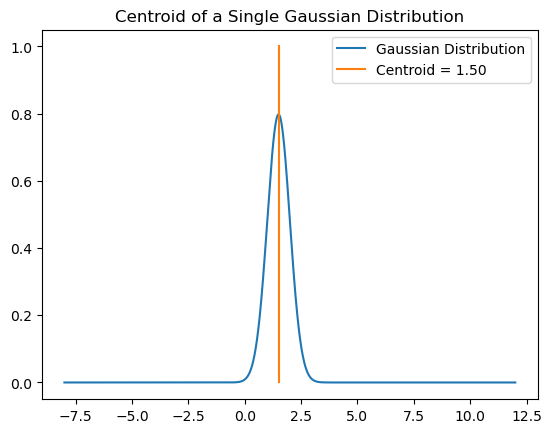

In [11]:
# Generate a range of x values
x = np.linspace(-8, 12, 2001)

# Define parameters for the Gaussian distribution
flux = 1.0  # Total flux of the distribution
mu = 1.5  # Mean (center) of the distribution
sigma = 0.5  # Standard deviation of the distribution

# Generate the Gaussian distribution
y = flux * gaussian(x, mu, sigma)

# Normalize the distribution so that the area under the curve is 1
normalisation = simpson(x=x, y=y)
y /= normalisation

# Calculate the centroid of the distribution
centroid = simpson(x=x, y=y * x)

# Plot the distribution and the centroid
plt.plot(x, y, label='Gaussian Distribution')
plt.plot([centroid, centroid], [0, 1.0], label=f'Centroid = {centroid:.2f}') # Plot a vertical line at the centroid
plt.title('Centroid of a Single Gaussian Distribution')
plt.legend()
plt.show()

Centroid = 2.0
Flux-weighted average mu = 2.0


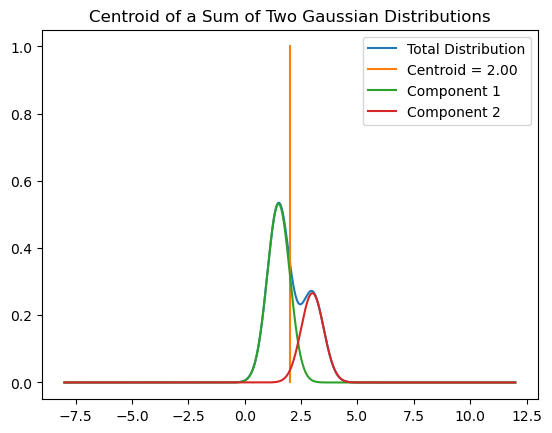

In [12]:
# Define parameters for a second Gaussian distribution
mu2 = 3.0
sigma2 = sigma
flux2 = 0.5

# Generate the second Gaussian distribution
y2 = flux2 * gaussian(x, mu2, sigma2)

# Combine the two distributions
y_total = y + y2

# Normalize the combined distribution
normalisation = simpson(x=x, y=y_total)
y_total /= normalisation

# Calculate the centroid of the combined distribution
centroid = simpson(x=x, y=y_total * x)

# Calculate the flux-weighted average of the means
flux_weighted_average_mu = (flux * mu + flux2 * mu2) / (flux + flux2)

# Print the results
print(f'Centroid = {centroid}')
print(f'Flux-weighted average mu = {flux_weighted_average_mu}')

# Plot the combined distribution and the individual components
plt.plot(x, y_total, label='Total Distribution')
plt.plot([centroid, centroid], [0, 1.0], label=f'Centroid = {centroid:.2f}') # Plot a vertical line at the centroid
plt.plot(x, y / normalisation, label='Component 1') # Plot normalized component 1
plt.plot(x, y2 / normalisation, label='Component 2') # Plot normalized component 2
plt.title('Centroid of a Sum of Two Gaussian Distributions')
plt.legend()
plt.show()

In [13]:
# Define a Lorentzian function
lorentzian = (
    lambda x, x0, gamma: 1 / np.pi * (gamma / ((x - x0)**2 + gamma**2))
)

Centroid = 1.5164121729551625


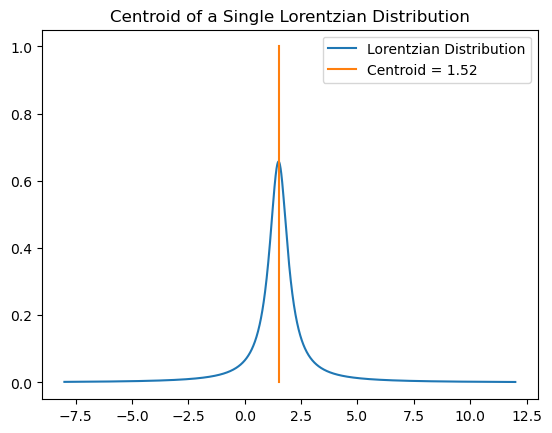

In [14]:
# Define parameters for the Lorentzian distribution
flux = 1.0  # Total flux of the distribution
x0 = 1.5  # Peak position of the distribution
gamma = 0.5  # Half-width at half-maximum

# Generate the Lorentzian distribution
y = flux * lorentzian(x, x0, gamma)

# Normalize the distribution
normalisation = simpson(x=x, y=y)
y /= normalisation

# Calculate the centroid
centroid = simpson(x=x, y=y * x)

# Print the centroid
print(f'Centroid = {centroid}')

# Plot the distribution and the centroid
plt.plot(x, y, label='Lorentzian Distribution')
plt.plot([centroid, centroid], [0, 1.0], label=f'Centroid = {centroid:.2f}') # Plot a vertical line at the centroid
plt.title('Centroid of a Single Lorentzian Distribution')
plt.legend()
plt.show()

Centroid = 1.9895019843721562
Flux-weighted average x0 = 2.0


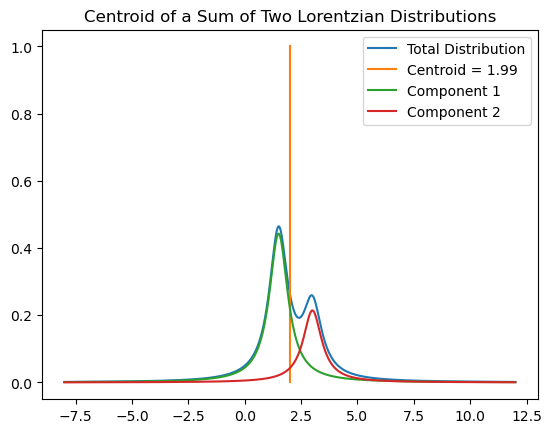

In [15]:
# Define parameters for a second Lorentzian distribution
x0_2 = 3.0
gamma2 = gamma
flux2 = 0.5

# Generate the second Lorentzian distribution
y2 = flux2 * lorentzian(x, x0_2, gamma2)

# Combine the two distributions
y_total = y + y2

# Normalize the combined distribution
normalisation = simpson(x=x, y=y_total)
y_total /= normalisation

# Calculate the centroid of the combined distribution
centroid = simpson(x=x, y=y_total * x)

# Calculate the flux-weighted average of the peak positions
flux_weighted_average_x0 = (flux * x0 + flux2 * x0_2) / (flux + flux2)

# Print the results
print(f'Centroid = {centroid}')
print(f'Flux-weighted average x0 = {flux_weighted_average_x0}')

# Plot the combined distribution and the individual components
plt.plot(x, y_total, label='Total Distribution')
plt.plot([centroid, centroid], [0, 1.0], label=f'Centroid = {centroid:.2f}') # Plot a vertical line at the centroid
plt.plot(x, y / normalisation, label='Component 1') # Plot normalized component 1
plt.plot(x, y2 / normalisation, label='Component 2') # Plot normalized component 2
plt.title('Centroid of a Sum of Two Lorentzian Distributions')
plt.legend()
plt.show()

In [16]:
def gaussian_2d(x, y, mu_x, mu_y, sigma_x, sigma_y):
    """
    Computes the value of a 2D Gaussian function at points (x, y).

    This function describes a 2D normal distribution with no correlation
    between the x and y variables.

    Args:
        x (np.ndarray): A 2D array of x-coordinates.
        y (np.ndarray): A 2D array of y-coordinates.
        mu_x (float): The mean of the Gaussian distribution in the x-direction.
        mu_y (float): The mean of the Gaussian distribution in the y-direction.
        sigma_x (float): The standard deviation in the x-direction.
        sigma_y (float): The standard deviation in the y-direction.

    Returns:
        np.ndarray: A 2D array containing the values of the Gaussian function.
    """
    # Calculate the normalization constant
    prefactor = 1 / (2 * np.pi * sigma_x * sigma_y)

    # Calculate the exponent term
    exponent = -0.5 * (((x - mu_x) / sigma_x) ** 2 + ((y - mu_y) / sigma_y) ** 2)

    return prefactor * np.exp(exponent)


def simpsons_2d(Z, x, y):
    """
    Performs 2D integration on a 2D array using Simpson's rule.

    Args:
        Z (np.ndarray): A 2D array of function values.
                        The dimensions must be odd.
        x (np.ndarray): 1D array of x-coordinates.
        y (np.ndarray): 1D array of y-coordinates.

    Returns:
        float: The result of the 2D integration.
    """
    Ny, Nx = Z.shape
    if Nx % 2 == 0 or Ny % 2 == 0:
        raise ValueError(
            "The number of grid points in each dimension must be odd for Simpson's rule."
        )

    # Calculate grid spacings from coordinate arrays, assuming uniform spacing.
    dx = x[1] - x[0]
    dy = y[1] - y[0]

    # Create 1D weight vectors for x and y directions
    wx = np.ones(Nx)
    wx[1:-1:2] = 4  # Even indices get weight 4
    wx[2:-1:2] = 2  # Odd indices get weight 2

    wy = np.ones(Ny)
    wy[1:-1:2] = 4
    wy[2:-1:2] = 2

    # Create 2D weight matrix by taking the outer product
    W = np.outer(wy, wx)

    # Perform the integration
    integral = (dx * dy / 9.0) * np.sum(W * Z)
    return integral


def plot_image_with_marginals(x, y, Z, centroid=None):
    """
    Creates a plot of a 2D image with its marginalized distributions.

    Args:
        x (np.ndarray): 1D array of x-coordinates.
        y (np.ndarray): 1D array of y-coordinates.
        Z (np.ndarray): 2D array of image data.
        centroid (tuple, optional): A tuple (cx, cy) for the centroid.
                                    If provided, it's plotted.
    """
    # --- Set up the figure and axes ---
    fig = plt.figure(figsize=(8, 8))

    # Define the grid layout
    gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 3])

    # Main contour plot
    ax_main = plt.subplot(gs[1, 0])

    # X-marginal plot (top)
    ax_x = plt.subplot(gs[0, 0], sharex=ax_main)

    # Y-marginal plot (right)
    ax_y = plt.subplot(gs[1, 1], sharey=ax_main)

    # --- Calculate marginals ---
    marginal_x = np.sum(Z, axis=0)
    marginal_y = np.sum(Z, axis=1)

    # --- Plotting ---

    # Main contour plot
    ax_main.contourf(x, y, Z, cmap="viridis", levels=50)
    ax_main.set_xlabel("X-axis")
    ax_main.set_ylabel("Y-axis")
    ax_main.grid(True)
    ax_main.set_aspect("equal", adjustable="box")

    # X-marginal plot
    ax_x.plot(x, marginal_x)
    ax_x.set_ylabel("Sum")
    ax_x.grid(True)
    plt.setp(ax_x.get_xticklabels(), visible=False)

    # Y-marginal plot
    ax_y.plot(marginal_y, y)
    ax_y.set_xlabel("Sum")
    ax_y.grid(True)
    plt.setp(ax_y.get_yticklabels(), visible=False)

    # Plot centroid if provided
    if centroid is not None:
        cx, cy = centroid
        # Plot star on main image
        ax_main.plot(
            cx,
            cy,
            "*",
            color="red",
            markersize=15,
            label="Centroid",
            markeredgecolor="white",
        )
        # Plot lines on marginal plots
        ax_x.axvline(cx, color="red", linestyle="--")
        ax_y.axhline(cy, color="red", linestyle="--")
        ax_main.legend()

    plt.suptitle("Image with Marginalized Distributions", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

0.9999999999999575


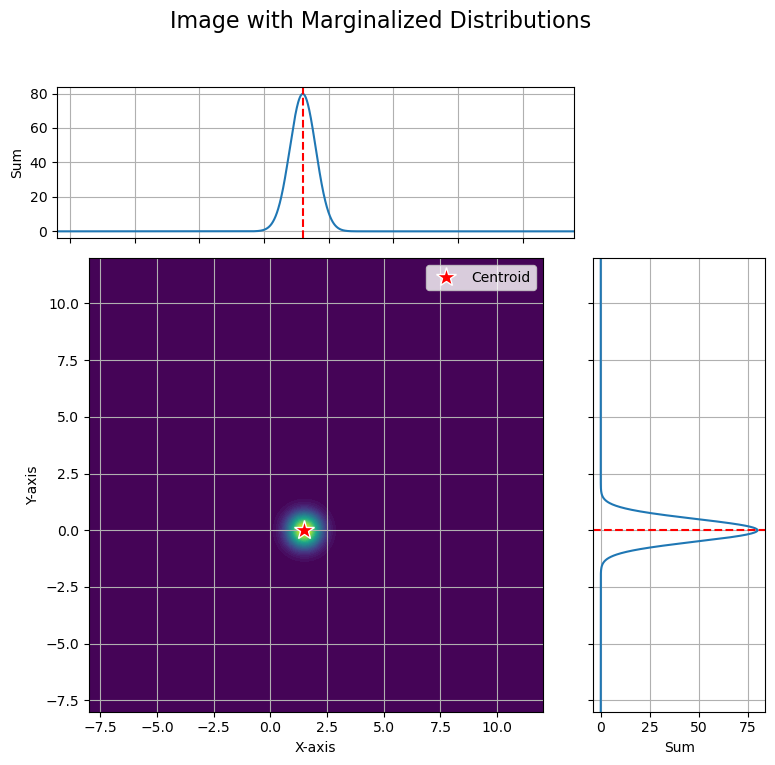

In [17]:
# Define parameters for the Gaussian distribution
flux = 1.0  # Total flux of the distribution
mu_x = 1.5  # Mean (center) of the distribution
sigma_x = 0.5  # Standard deviation of the distribution
mu_y = 0.0  # Mean (center) of the distribution
sigma_y = sigma_x  # Standard deviation of the distribution

xx, yy = np.meshgrid(x, x)

image = flux*gaussian_2d(xx,yy,mu_x,mu_y,sigma_x,sigma_y)

normalisation = simpsons_2d(image,x,x)

print(normalisation)

image /= normalisation

centroid_x = simpsons_2d(image*xx,x,x)
centroid_y = simpsons_2d(image * yy, x, x)


plot_image_with_marginals(x,x,image,(centroid_x,centroid_y))

Mux flux-weighted average = 2.0
Muy flux-weighted average = 0.16666666666666666
Mux centroid = 1.9999999999999862
Muy centroid = 0.1666666666666619


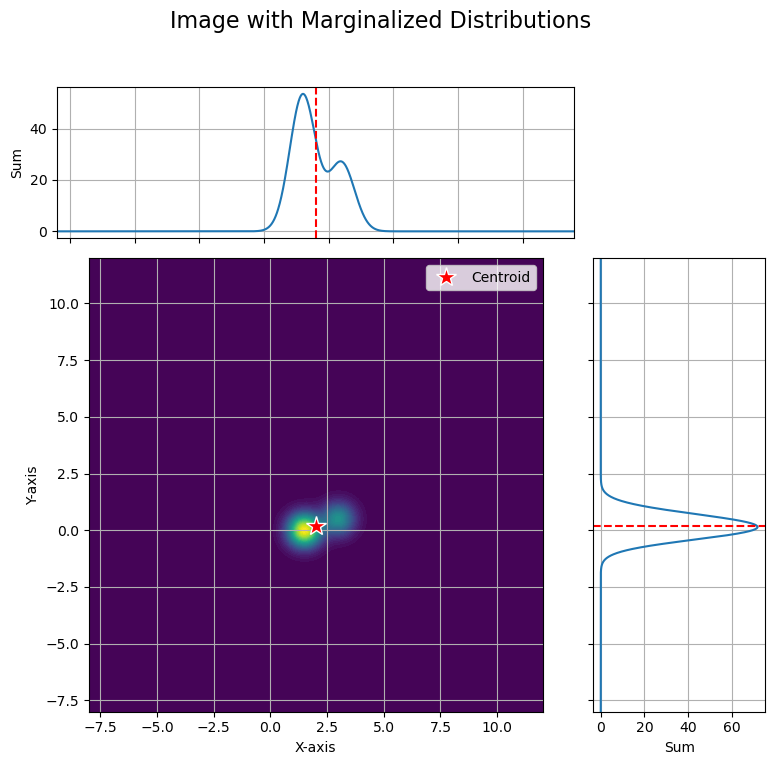

In [9]:
# Define parameters for the Gaussian distribution
flux2 = 0.5 # Total flux of the distribution
mu_x2 = 3.0  # Mean (center) of the distribution
mu_y2 = 0.5  # Mean (center) of the distribution

image2 = flux2 * gaussian_2d(xx, yy, mu_x2, mu_y2, sigma_x, sigma_y) + image

normalisation = simpsons_2d(image2, x, x)

image2 /= normalisation

centroid_x2 = simpsons_2d(image2 * xx, x, x)
centroid_y2 = simpsons_2d(image2 * yy, x, x)

print(
    "Mux flux-weighted average = " + str((flux * mu_x + flux2 * mu_x2) / (flux + flux2))
)
print(
    "Muy flux-weighted average = " + str((flux * mu_y + flux2 * mu_y2) / (flux + flux2))
)

print("Mux centroid = " + str(centroid_x2))
print("Muy centroid = " + str(centroid_y2))


plot_image_with_marginals(x, x, image2, (centroid_x2, centroid_y2))